Homework 2
Jamie Wong, jmw488 & Emma Wang, exw2

# 1a

In [26]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

n=10000

X = np.random.uniform(low=-1, high=1, size=n)
Y = np.random.uniform(low=-1, high=1, size=n)
Z = []
count = 0 
for i in range(n):
    if X[i]**2+ Y[i]**2 <= 1:
        Z.append(1)
        count += 1
    else:
        Z.append(0)
prob = float(count)/n
print(count)
print(prob)

7823
0.7823


####  expression for estimating pi = prob = areacircle/areasquare
#### areasquare = $2^2 = 4$
#### expression for estimating pi = $\frac{\pi}{4}$


#### what type of distribution is $N_{circle}$ ? 
#### binomial distribution

# 1b

### $\bar X_N = \frac{1}{N}\sum\limits_{n=1}^{N}X_N$ = $\frac{1}{10000} * (7823) = 0.7823$

In [81]:
pi = math.pi
var = (pi/4)*(1-(pi/4))
print(var)

""""
X_N = 0.7823
diff = []
var = 0
sumsq = 0 
for i in Z:
    diff.append((i-X_N)**2)
for k in diff:
    sumsq = sumsq + k
var = (1/(10000.-1))*(sumsq)
print(var)
"""

0.168547888329


'"\nX_N = 0.7823\ndiff = []\nvar = 0\nsumsq = 0 \nfor i in Z:\n    diff.append((i-X_N)**2)\nfor k in diff:\n    sumsq = sumsq + k\nvar = (1/(10000.-1))*(sumsq)\nprint(var)\n'

$s_N^2 = 0.17032374374$

$100(1-\alpha)% = 90%$ $\implies \alpha = 0.1 \\ 
z_{\frac{\alpha}{2}} = 1.645$


half width = 0.005

In [82]:
z = 1.645
N = (var)*(z**2)/(0.005**2)
print(math.ceil(N))

18244.0


# N = 18244

# 1c

In [109]:
#run simulation with n = 3141

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

n=18244

X = np.random.uniform(low=-1, high=1, size=n)
Y = np.random.uniform(low=-1, high=1, size=n)
Z = []
count = 0 
for i in range(n):
    if X[i]**2+ Y[i]**2 <= 1:
        Z.append(1)
        count += 1
    else:
        Z.append(0)
prob = float(count)/n
print(count)
print(prob)

14326
0.785244463933


In [110]:
#compute variance of N = 3141
X_N = 0.7823
diff = []
var = 0
sumsq = 0 
for i in Z:
    diff.append((i-X_N)**2)
for k in diff:
    sumsq = sumsq + k
var = (1/(10000.-1))*(sumsq)
print(1.645*(math.sqrt(var)/math.sqrt(n)))

0.00675574747245


In [111]:
pi = prob*4
print(pi)

3.14097785573


##### $CI = 3.14097785573\pm 0.00675574$


# 2a

In [8]:
%pylab inline
def buffon(N,length,dist,seed=-1):
    # N = number of throws 
    # length = length of match
    # dist = distance between lines
    # seed = seed for random number generator
    
    # Visualize parallel vertical lines
    
    if seed==-1:
        xcent = np.random.uniform(0,dist/2.0,N) # random x-coordinate of center point
        theta = np.random.uniform(0,math.pi/2,N) # random angle
    else:
        np.random.seed(seed)
        xcent = np.random.uniform(0,dist/2.0,N) # random x-coordinate of center point
        theta = np.random.uniform(0,math.pi/2,N) # random angle

    xtip_l  = xcent - (length/2.0)*np.cos(theta) # generate left endpoint
    pihatN = 2.*length*N/(dist*(sum(xtip_l < 0)))     
    return pihatN

Populating the interactive namespace from numpy and matplotlib


In [9]:
sample_estimate = buffon(156,1,1)
print sample_estimate

3.18367346939


In [50]:
import numpy as np

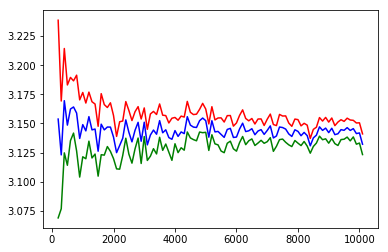

In [69]:
#plot values n between 10 and 10,000, 30 times 
n = 100
nvec = []
count = 0
pimean = []
ci_hi = []
ci_low = []
while n <= 10000:
    pihat = []
    for i in range(0,30):
        pihat.append(buffon(n,1,1))
    sd = np.std(pihat)
    pimean.append(np.mean(pihat))
    ci_hi.append(np.mean(pihat)+1.96*sd/math.sqrt(30))
    ci_low.append(np.mean(pihat)-1.96*sd/math.sqrt(30))
    n+=100
    nvec.append(n)
x = np.arange(100,10000,100)

plt.plot(nvec, pimean , 'b-', label='Mean')
plt.plot(nvec, ci_hi, 'r-', label='Upper CI')
plt.plot(nvec, ci_low, 'g-', label='Lower CI')


# 2b

over = 0
under = 0
for i in pimean:
    if i > math.pi:
        over+=1
    else:
        under+=1
print(over)
print(under)

### It tends to overestimate pi.

# 3a. 

# 3b.

(b) Use your simulation to give a 95% confidence interval for the probability, q, that 475 or more of the 500 wafers in a batch are acceptable. Choose the number of samples appropriately so that your estimate of q is accurate to one decimal place

$sd = \sqrt{\frac{p*(1-p)}{N}} = \sqrt{\frac{0.95*(0.05)}{1274480}}$